<a href="https://colab.research.google.com/github/ahassanzadeh/CarPricePrediction/blob/main/1_ProblemStatement_and_Data_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

What is the estimated price for the following two vehicles in Excellent condition in Sept 2021?
- **2019 BMW 3 series 2.0 320D Sport Steptronic**
  - Model year = 2019 
  - BRAND NAME = BMW
  - Model Name = 3 series
  - Engine Size = 2.0
  - VERSION NAME = 320D Sport Steptronic 
- **2018 Holden Trax 1.4 Turbo LTZ Auto**
  - Model year = 2018
  - BRAND NAME = HOLDEN
  - Model Name = Trax
  - Engine Size = 1.4
  - Turbo = True 
  - VERSION NAME = 320D Sport Steptronic 


# **Data Visualization**

## Reading and Understading the data 

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__)

1.1.5


In [2]:
cars = pd.read_excel("/content/drive/MyDrive/Job Interview /Companies/Cox/Interview_Data.xlsx")
cars.head()

,Transaction ID,VEHICLE ID,ODOMETER (KM),SOLD PRICE,SOLD DATE,CONDITION GRADE,SELLER STATE,MODEL YEAR,BRAND NAME,MODEL NAME,VERSION NAME,SEGMENTNAME,SUBSEGMENTNAME,BODYTYPE,ENGINE,VEHICLETYPE,MSRP,WEIGHT,COUNTRYOFORIGIN_ADJ,FUEL,DRIVETRAIN
0,5674384,25169,18489,40100,2020-06-19,2.0,VIC,2018,Audi,A4,1.4 TFSI S tronic S line,Medium Car,Luxury Medium Car,Sedan,1.4L In-Line Turbo 4-cyl Premium Unleaded,Passenger,56100.0,1450,Germany,Petrol,4x2
1,6074511,3204,18908,47000,2020-06-25,2.0,VIC,2018,Mercedes-Benz,C-Class,1.5 C 200 9G Tronic,Medium Car,Luxury Medium Car,Sedan,1.5L In-Line Turbo 4-cyl Premium Unleaded,Passenger,63400.0,1505,South Africa,Petrol,4x2
2,6120557,84433,18913,64000,2020-09-17,1.0,VIC,2019,BMW,5 Series,2.0 530i M Sport Steptronic,Large Car,Luxury Large Car,Sedan,2.0L In-Line Turbo 4-cyl Premium Unleaded,Passenger,111900.0,1540,Germany,Petrol,4x2
3,6048675,3205,19012,43500,2020-06-18,1.0,VIC,2019,Mercedes-Benz,C-Class,1.5 C 200 9G Tronic,Medium Car,Luxury Medium Car,Sedan,2.0L In-Line Turbo 4-cyl Premium Unleaded,Passenger,64500.0,1505,South Africa,Petrol,4x2
4,5582987,18369,69652,14250,2020-05-28,2.0,VIC,2018,Holden,Trax,1.4 Turbo LTZ Auto,SUV Small,Mid-Range SUV Small,SUV/Crossover,1.4L In-Line Turbo 4-cyl Premium Unleaded,Passenger,30490.0,1437,Korea,Petrol,4x2


In [3]:
cars.shape

(11135, 21)

In [4]:
cars.describe()

,Transaction ID,VEHICLE ID,ODOMETER (KM),SOLD PRICE,CONDITION GRADE,MODEL YEAR,MSRP,WEIGHT
count,1.113500e+04,11135.000000,11135.000000,11135.000000,11110.000000,11135.000000,11135.000000,11135.000000
mean,5.682850e+06,49592.713785,18224.311450,34668.879659,1.346355,2018.360934,49081.573054,1747.981679
std,2.547795e+05,28835.127962,22461.099331,17364.138990,0.553650,0.542136,20903.691561,338.520331
min,5.226908e+06,3204.000000,501.000000,300.000000,1.000000,2018.000000,17490.000000,1090.000000
25%,5.503982e+06,25369.000000,6176.000000,23250.000000,1.000000,2018.000000,33850.000000,1437.000000
50%,5.600817e+06,38664.000000,8767.000000,30800.000000,1.000000,2018.000000,41490.000000,1610.000000
75%,5.735272e+06,75630.500000,16608.000000,43000.000000,2.000000,2019.000000,58375.000000,1995.000000
max,6.228389e+06,109714.000000,143563.000000,530000.000000,4.000000,2020.000000,247329.000000,2867.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135 entries, 0 to 11134
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       11135 non-null  int64         
 1   VEHICLE ID           11135 non-null  int64         
 2   ODOMETER (KM)        11135 non-null  int64         
 3   SOLD PRICE           11135 non-null  int64         
 4   SOLD DATE            11135 non-null  datetime64[ns]
 5   CONDITION GRADE      11110 non-null  float64       
 6   SELLER STATE         11135 non-null  object        
 7   MODEL YEAR           11135 non-null  int64         
 8   BRAND NAME           11135 non-null  object        
 9   MODEL NAME           11135 non-null  object        
 10  VERSION NAME         11135 non-null  object        
 11  SEGMENTNAME          11135 non-null  object        
 12  SUBSEGMENTNAME       11135 non-null  object        
 13  BODYTYPE             11135 non-

### Finding the two instances that we are going to predict the price in the data

In [6]:
# prediction 1 
pred1 = cars[cars['VEHICLE ID'] == int(13229)]
pred1.head()

,Transaction ID,VEHICLE ID,ODOMETER (KM),SOLD PRICE,SOLD DATE,CONDITION GRADE,SELLER STATE,MODEL YEAR,BRAND NAME,MODEL NAME,VERSION NAME,SEGMENTNAME,SUBSEGMENTNAME,BODYTYPE,ENGINE,VEHICLETYPE,MSRP,WEIGHT,COUNTRYOFORIGIN_ADJ,FUEL,DRIVETRAIN
686,6068693,13229,5030,50000,2020-09-24,1.0,VIC,2019,BMW,3 Series,2.0 320d M Sport Steptronic,Medium Car,Luxury Medium Car,Sedan,2.0L In-Line Turbo 4-cyl Diesel,Passenger,69954.0,1450,Germany,Diesel,4x2
8533,6127476,13229,5480,47500,2020-10-01,2.0,VIC,2019,BMW,3 Series,2.0 320d M Sport Steptronic,Medium Car,Luxury Medium Car,Sedan,2.0L In-Line Turbo 4-cyl Diesel,Passenger,69954.0,1450,Germany,Diesel,4x2


In [7]:
# prediction 2 
pred2 = cars[cars['VEHICLE ID'] == int(18369)]
pred2.head()

,Transaction ID,VEHICLE ID,ODOMETER (KM),SOLD PRICE,SOLD DATE,CONDITION GRADE,SELLER STATE,MODEL YEAR,BRAND NAME,MODEL NAME,VERSION NAME,SEGMENTNAME,SUBSEGMENTNAME,BODYTYPE,ENGINE,VEHICLETYPE,MSRP,WEIGHT,COUNTRYOFORIGIN_ADJ,FUEL,DRIVETRAIN
4,5582987,18369,69652,14250,2020-05-28,2.0,VIC,2018,Holden,Trax,1.4 Turbo LTZ Auto,SUV Small,Mid-Range SUV Small,SUV/Crossover,1.4L In-Line Turbo 4-cyl Premium Unleaded,Passenger,30490.0,1437,Korea,Petrol,4x2
5,5580167,18369,69659,13600,2019-08-29,1.0,VIC,2018,Holden,Trax,1.4 Turbo LTZ Auto,SUV Small,Mid-Range SUV Small,SUV/Crossover,1.4L In-Line Turbo 4-cyl Premium Unleaded,Passenger,30490.0,1437,Korea,Petrol,4x2
7,6017875,18369,69758,10250,2020-04-02,1.0,VIC,2018,Holden,Trax,1.4 Turbo LTZ Auto,SUV Small,Mid-Range SUV Small,SUV/Crossover,1.4L In-Line Turbo 4-cyl Premium Unleaded,Passenger,30490.0,1437,Korea,Petrol,4x2
10,5580196,18369,69990,15200,2020-02-04,2.0,VIC,2018,Holden,Trax,1.4 Turbo LTZ Auto,SUV Small,Mid-Range SUV Small,SUV/Crossover,1.4L In-Line Turbo 4-cyl Premium Unleaded,Passenger,30490.0,1437,Korea,Petrol,4x2
12,5399461,18369,70002,15600,2020-02-04,2.0,VIC,2018,Holden,Trax,1.4 Turbo LTZ Auto,SUV Small,Mid-Range SUV Small,SUV/Crossover,1.4L In-Line Turbo 4-cyl Premium Unleaded,Passenger,30490.0,1437,Korea,Petrol,4x2


# Step 2: Data Visualization

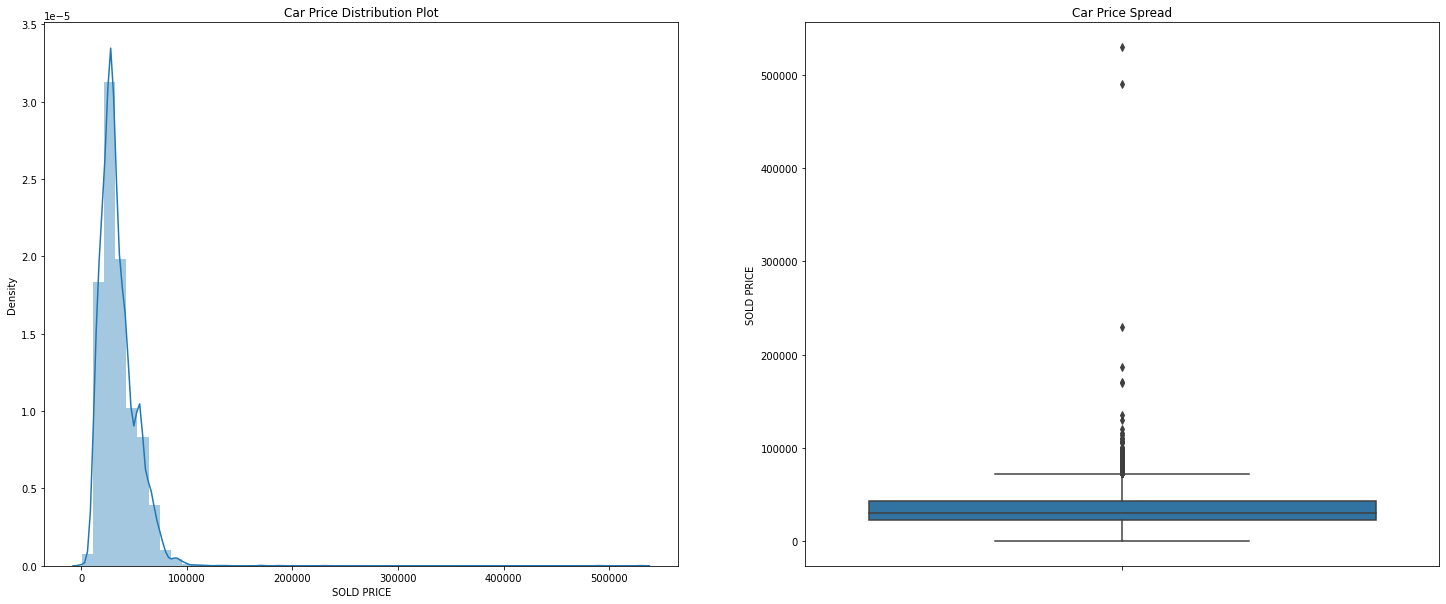

In [8]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars['SOLD PRICE'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars['SOLD PRICE'])

plt.show()

In [9]:
print(cars['SOLD PRICE'].describe(percentiles = [0.25,0.50,0.6, 0.75,0.8,0.90, 0.95, 1]))


count     11135.000000
mean      34668.879659
std       17364.138990
min         300.000000
25%       23250.000000
50%       30800.000000
60%       34500.000000
75%       43000.000000
80%       47000.000000
90%       57000.000000
95%       65250.000000
100%     530000.000000
max      530000.000000
Name: SOLD PRICE, dtype: float64


## Inference :
- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 43000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(80% of the prices are below 47000, whereas the remaining 100% are between 57000 to 530000.)

## 3.1 Visualizing Categorial Data 

In [10]:
cars.columns

Index(['Transaction ID', 'VEHICLE ID', 'ODOMETER (KM)', 'SOLD PRICE',
       'SOLD DATE', 'CONDITION GRADE', 'SELLER STATE', 'MODEL YEAR',
       'BRAND NAME', 'MODEL NAME', 'VERSION NAME', 'SEGMENTNAME',
       'SUBSEGMENTNAME', 'BODYTYPE', 'ENGINE', 'VEHICLETYPE', 'MSRP', 'WEIGHT',
       'COUNTRYOFORIGIN_ADJ', 'FUEL', 'DRIVETRAIN'],
      dtype='object')

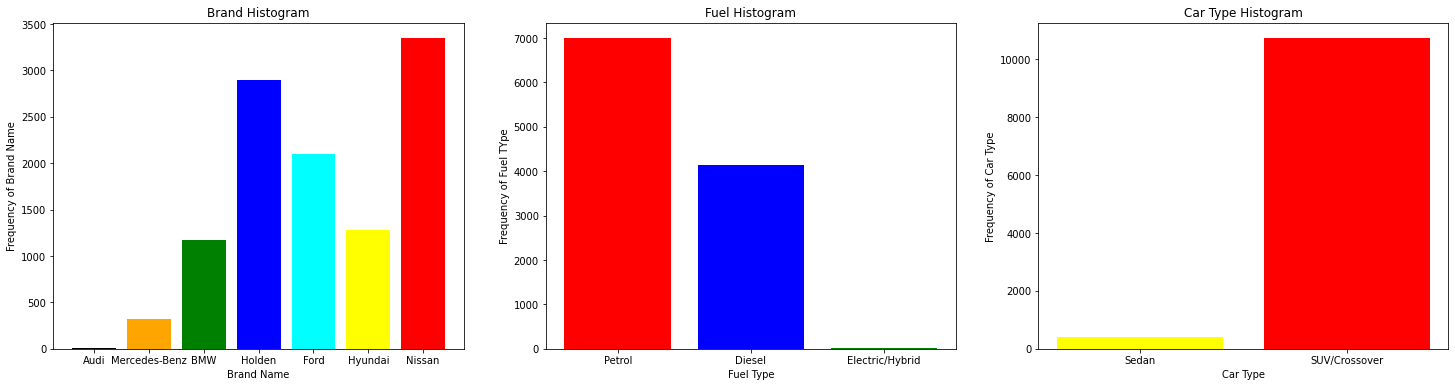

In [11]:
plt.figure(figsize=(25, 6)) 

plt.subplot(1,3,1)
dic = {}
for brand in cars['BRAND NAME']:
  if brand not in dic:
    dic[brand] = 1
  else:
    dic[brand] += 1

plt.bar(range(len(dic)), list(dic.values()), align='center', color=['black', 'orange', 'green', 'blue', 'cyan', 'yellow', 'red'])
plt.xticks(range(len(dic)), list(dic.keys()))
plt.title('Brand Histogram')
plt.xlabel('Brand Name')
plt.ylabel('Frequency of Brand Name')
plt.subplot(1, 3, 2)
dic1 = {}
for fuel in cars['FUEL']:
  if fuel not in dic1:
    dic1[fuel] = 1
  else:
    dic1[fuel] += 1

plt.bar(range(len(dic1)), list(dic1.values()), align='center', color=['red', 'blue', 'green'])
plt.xticks(range(len(dic1)), list(dic1.keys()))
plt.title('Fuel Histogram')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency of Fuel TYpe')


plt.subplot(1,3, 3)
dic2 = {}
for body in cars['BODYTYPE']:
  if body not in dic2:
    dic2[body] = 1
  else:
    dic2[body] += 1


plt.bar(range(len(dic2)), list(dic2.values()), align='center', color=['yellow', 'red'])
plt.xticks(range(len(dic2)), list(dic2.keys()))
plt.title('Car Type Histogram')
plt.xlabel('Car Type')
plt.ylabel('Frequency of Car Type')

plt.show()

**Previous 3 graph Conclusions**
- Nissan is the most sold brand 
- Petrol Cars are sold the most 
- SUVs and Crossovers are the favorite cars 

In [12]:
len(cars['VEHICLE ID'].unique())

420

## Price Variance in respect to CONDITION GRADE

Number of cars with excellent condition in the dataset 7662
Number of cars with good condition in the dataset 3093
Number of cars with average condition in the dataset 310
Number of cars with bad condition in the dataset 45


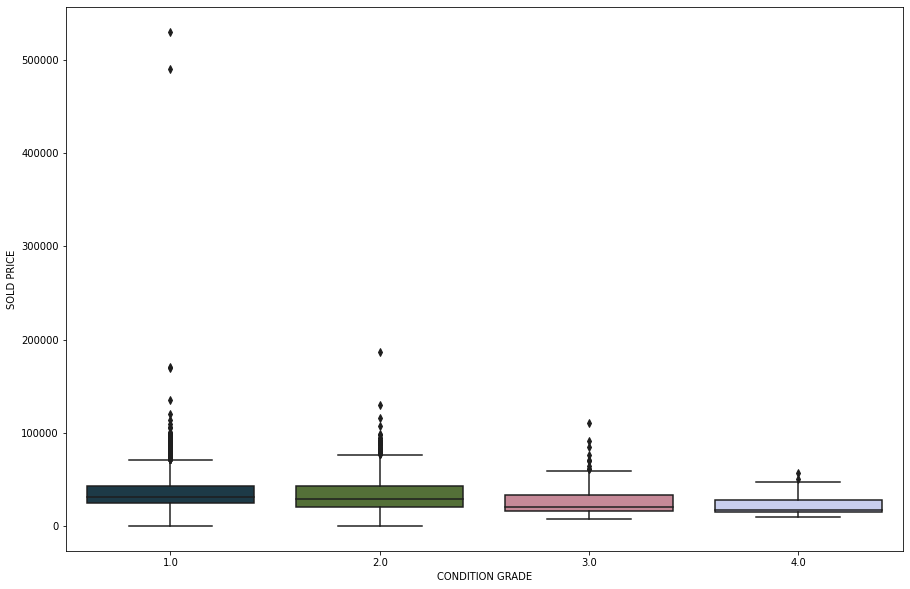

In [13]:
# comparison of SOLD PRICE vs condition 
plt.figure(figsize= (15, 10))
sns.boxplot(x = cars['CONDITION GRADE'], y = cars['SOLD PRICE'], palette= ('cubehelix'))
print("Number of cars with excellent condition in the dataset", len(cars[cars['CONDITION GRADE'] == 1]))
print("Number of cars with good condition in the dataset", len(cars[cars['CONDITION GRADE'] == 2]))
print("Number of cars with average condition in the dataset", len(cars[cars['CONDITION GRADE'] == 3]))
print("Number of cars with bad condition in the dataset", len(cars[cars['CONDITION GRADE'] == 4]))


**Inference**
- Car with excellent condition have high price variance and resale value 
- They are more instances avaiable for  cars with excellent conditions in the datasets

# Resale Price change in respect to Country, Fuel and Body type

<Figure size 1800x864 with 0 Axes>

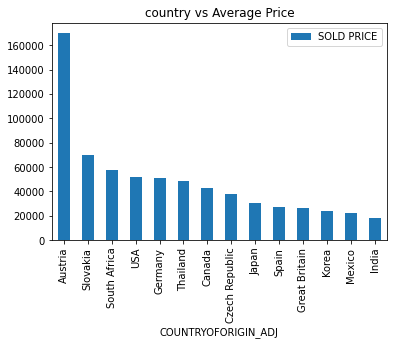

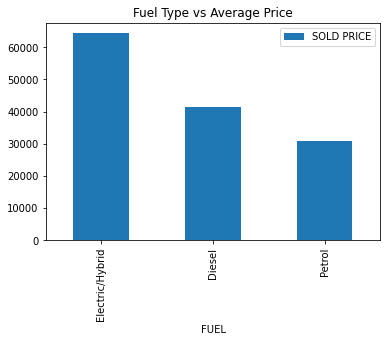

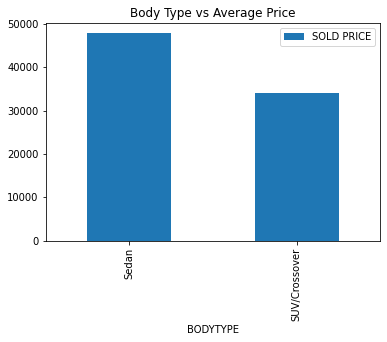

In [14]:
plt.figure(figsize=(25, 12))

df = pd.DataFrame(cars.groupby(['COUNTRYOFORIGIN_ADJ'])['SOLD PRICE'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('country vs Average Price')

df = pd.DataFrame(cars.groupby(['FUEL'])['SOLD PRICE'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')

df = pd.DataFrame(cars.groupby(['BODYTYPE'])['SOLD PRICE'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Body Type vs Average Price')
plt.show()

**Inference**
- Austria is where most expensive car is sold in average however it does not mean, Austria is necessary is the most expensive company to buy resale car, however it means number of expensive car sold in Austrial is rare but dominat in the dataset. 
- Electric/Hybrid have highest resale price compare to Diesel and Gas. 
- Average Price of Sedan is higher than SUV/Crossover in the dataset. 


## 3.2 Step  Visualising numerical data


In [15]:
cars.columns

Index(['Transaction ID', 'VEHICLE ID', 'ODOMETER (KM)', 'SOLD PRICE',
       'SOLD DATE', 'CONDITION GRADE', 'SELLER STATE', 'MODEL YEAR',
       'BRAND NAME', 'MODEL NAME', 'VERSION NAME', 'SEGMENTNAME',
       'SUBSEGMENTNAME', 'BODYTYPE', 'ENGINE', 'VEHICLETYPE', 'MSRP', 'WEIGHT',
       'COUNTRYOFORIGIN_ADJ', 'FUEL', 'DRIVETRAIN'],
      dtype='object')

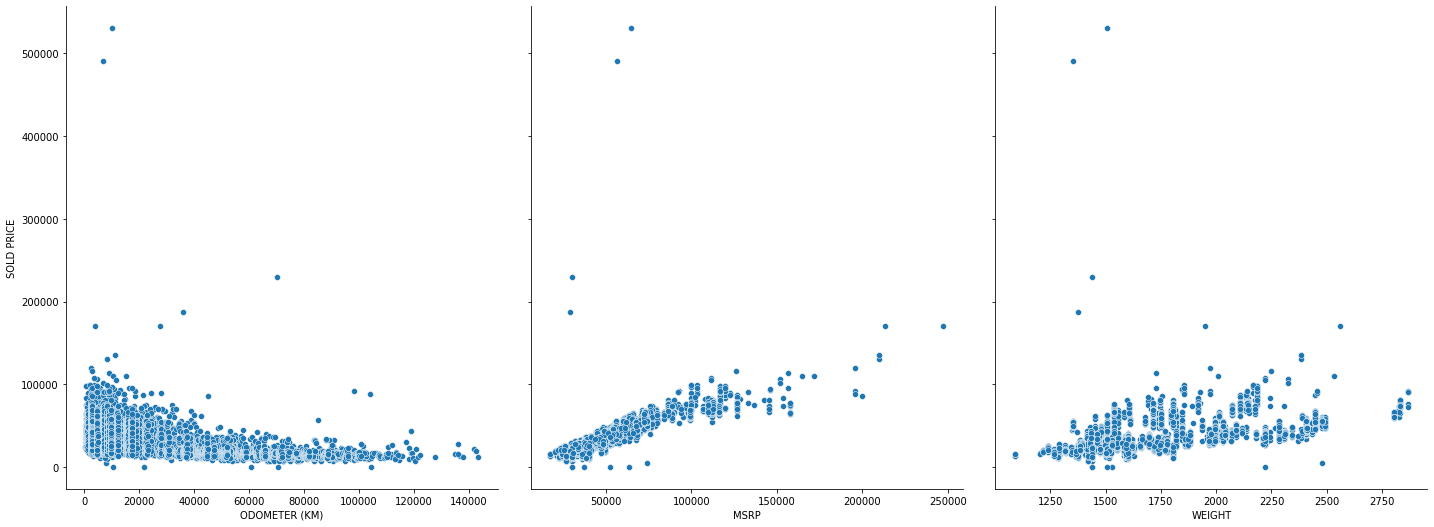

In [16]:
def numerical_plot(x,y,z):
    # sns.set(rc={'figure.figsize':(20,10)})
    g = sns.pairplot(cars, x_vars=[x,y,z], y_vars='SOLD PRICE',size=4, aspect=1, kind='scatter', height= 5)
    g.fig.set_figwidth(21)
    g.fig.set_figheight(8)
    
# sns.set(rc={'figure.figsize':(20,10)})
numerical_plot('ODOMETER (KM)', 'MSRP', 'WEIGHT')
plt.show()

**Inference**
- resale PRICE drops as ODOMETER increases 
- resale price increases as MSRP increases 
- resale price increases as Weight increases